In [3]:
import cox 
from cox.store import Store
from cox.readers import CollectionReader 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch as ch 
from torch import Tensor
from torch.distributions import Uniform
import os 
# set environment variable so that stores can create output files
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [40]:
reader = CollectionReader('/home/gridsan/stefanou/Regression/100DimsVar40')
logs = reader.df('results')
reader.close()
logs.head()

100%|██████████| 11/11 [00:00<00:00, 17.93it/s]


,known_emp_param_mse,known_param_mse,unknown_param_mse,unknown_var_mse,ols_param_mse,ols_var_mse,trunc_reg_param_mse,trunc_var_mse,alpha,var,exp_id
0,0.000025,0.000024,0.000034,0.159577,0.000219,0.000977,0.000021,0.000572,0.5237,1.0,a92bfbd3-b9ec-46d4-823e-4b052650bfe5
1,0.000123,0.000130,0.000077,0.563156,0.000589,0.001379,0.000102,0.000024,0.5230,2.0,a92bfbd3-b9ec-46d4-823e-4b052650bfe5
2,0.000079,0.000090,0.000250,1.089353,0.001579,0.025320,0.000078,0.009982,0.5066,3.0,a92bfbd3-b9ec-46d4-823e-4b052650bfe5
3,0.000158,0.000192,0.000649,1.209146,0.001860,0.016499,0.000142,0.004738,0.5074,4.0,a92bfbd3-b9ec-46d4-823e-4b052650bfe5
4,0.000134,0.000153,0.001076,2.003622,0.004055,0.031360,0.000136,0.000176,0.4933,5.0,a92bfbd3-b9ec-46d4-823e-4b052650bfe5


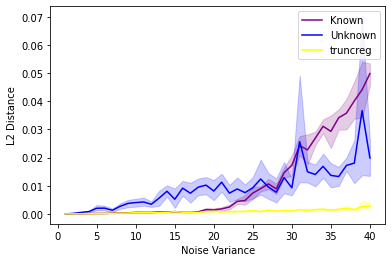

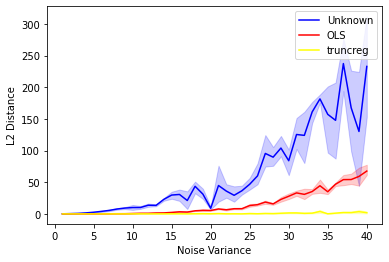

In [44]:
sns.lineplot(data=logs, x='var', y='known_param_mse', label='Known', color="purple")
# sns.lineplot(data=logs, x='var', y='known_emp_param_mse', label='Known Emp', color="orange")

sns.lineplot(data=logs, x='var', y='unknown_param_mse', label='Unknown', color="blue")
# ax = sns.lineplot(data=logs, x='var', y='ols_param_mse', label='OLS', color="red")
ax = sns.lineplot(data=logs, x='var', y='trunc_reg_param_mse', label='truncreg', color="yellow")
ax.set(xlabel='Noise Variance', ylabel='L2 Distance')
plt.show()

# sns.lineplot(data=logs, x='var', y='known_', label='Known', color="purple")
sns.lineplot(data=logs, x='var', y='unknown_var_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='var', y='ols_var_mse', label='OLS', color="red")
ax = sns.lineplot(data=logs, x='var', y='trunc_var_mse', label='truncreg', color="yellow")
ax.set(xlabel='Noise Variance', ylabel='L2 Distance')
plt.show()

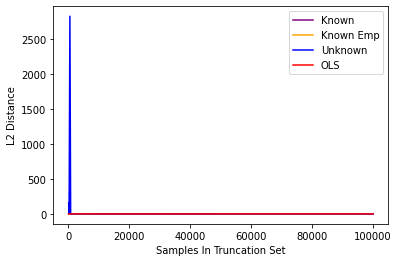

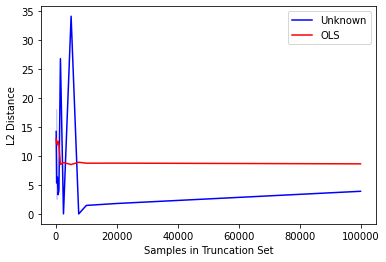

In [38]:
sns.lineplot(data=logs, x='s', y='known_param_mse', label='Known', color="purple")
sns.lineplot(data=logs, x='s', y='known_emp_param_mse', label='Known Emp', color="orange")
sns.lineplot(data=logs, x='s', y='unknown_param_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='s', y='ols_param_mse', label='OLS', color="red")
ax.set(xlabel='Samples In Truncation Set', ylabel='L2 Distance')
plt.show()

# sns.lineplot(data=logs, x='var', y='known_', label='Known', color="purple")
sns.lineplot(data=logs, x='s', y='unknown_var_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='s', y='ols_var_mse', label='OLS', color="red")
ax.set(xlabel='Samples in Truncation Set', ylabel='L2 Distance')
plt.show()

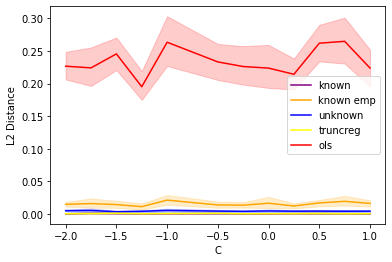

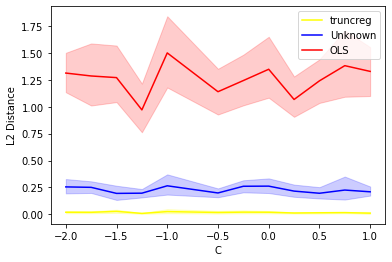

In [31]:
sns.lineplot(data=logs, x='c', y='known_param_mse', label='known', color="purple")
sns.lineplot(data=logs, x='c', y='known_emp_param_mse', label='known emp', color="orange")
sns.lineplot(data=logs, x='c', y='unknown_param_mse', label='unknown', color="blue")
sns.lineplot(data=logs, x='c', y='trunc_reg_param_mse', label='truncreg', color="yellow")
ax = sns.lineplot(data=logs, x='c', y='ols_param_mse', label='ols', color="red")
ax.set(xlabel='C', ylabel='L2 Distance')
plt.show()

sns.lineplot(data=logs, x='c', y='trunc_var_mse', label='truncreg', color="yellow")
sns.lineplot(data=logs, x='c', y='unknown_var_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='c', y='ols_var_mse', label='OLS', color="red")
ax.set(xlabel='C', ylabel='L2 Distance')
plt.show()

In [25]:
U = Uniform(-1, 1)
# U_ = Uniform(args.x_lower, args.x_upper)

In [48]:
ch.nn.MSELoss()(Tensor([trunc_df['x'][2]**2]), Tensor([20]))

tensor(0.0218)

In [27]:
ch.manual_seed(1)
# generate ground truth
ground_truth = ch.nn.Linear(in_features=1, out_features=1, bias=True)
ground_truth.weight = ch.nn.Parameter(U.sample(ch.Size([1, 1])))
ground_truth.bias = ch.nn.Parameter(U.sample(ch.Size([1, 1])))

In [32]:
params = ch.cat([ground_truth.weight, ground_truth.bias])
trunc_params = ch.cat([Tensor([trunc_df['x'][1]]), Tensor([trunc_df['x'][0]])])

In [35]:
trunc_params, params

(tensor([-0.1838,  0.3484]),
 tensor([[-0.1939],
         [ 0.4694]], grad_fn=<CatBackward>))

In [57]:
ch.nn.MSELoss()(trunc_params, params.flatten()), ch.nn.MSELoss()(Tensor([trunc_df['x'][2]])**2, Tensor([20]))

(tensor(0.0074, grad_fn=<MseLossBackward>), tensor(0.0218))

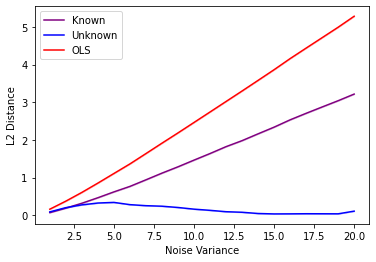

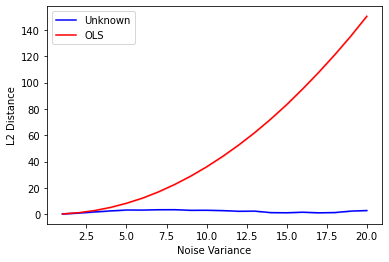

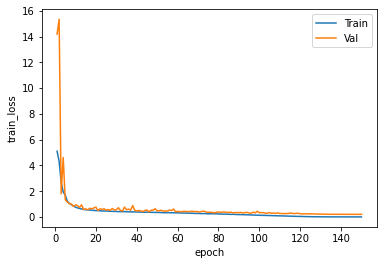

<AxesSubplot:xlabel='epoch', ylabel='train_prec1'>

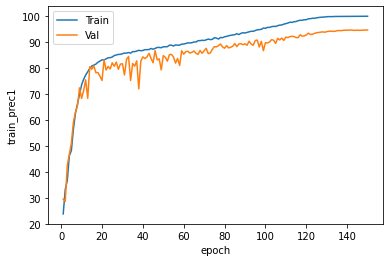

In [41]:
sns.lineplot(data=logs, x='epoch', y='train_loss', label='Train')
sns.lineplot(data=logs, x='epoch', y='val_loss', label='Val')
plt.show()
sns.lineplot(data=logs, x='epoch', y='train_prec1', label='Train')
sns.lineplot(data=logs, x='epoch', y='val_prec1', label='Val')

In [35]:
reader.close()

<AxesSubplot:xlabel='epoch', ylabel='train_prec1'>

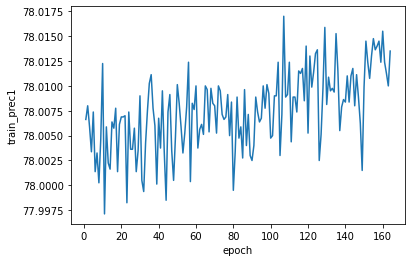

In [20]:
sns.lineplot(data=trunc, x='epoch', y='train_prec1')